<a href="https://colab.research.google.com/github/raisaksh1/Projects./blob/main/Fraudulent_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fraudlent Detection**

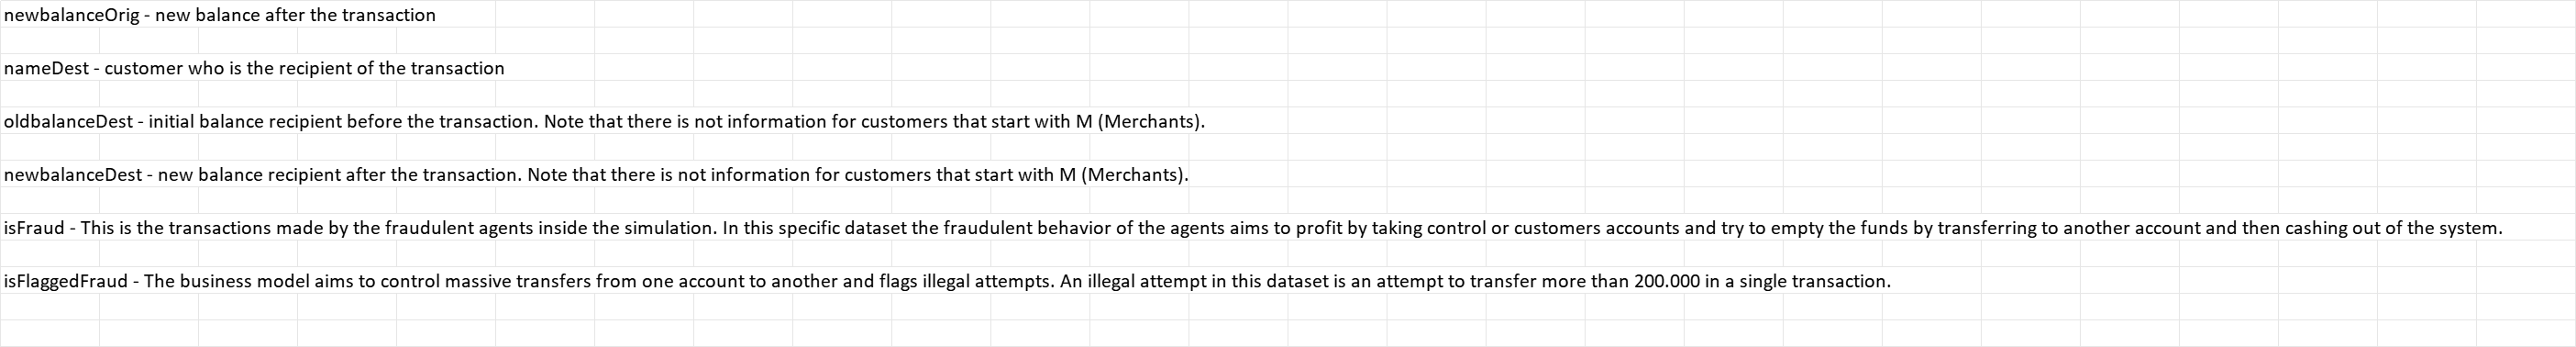


In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [2]:
credit_card_data = pd.read_csv('/content/Fraud.csv')

In [3]:
credit_card_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


Explotary Data Analysis(EDA)

In [4]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172840 entries, 0 to 1172839
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1172840 non-null  int64  
 1   type            1172840 non-null  object 
 2   amount          1172840 non-null  float64
 3   nameOrig        1172840 non-null  object 
 4   oldbalanceOrg   1172840 non-null  float64
 5   newbalanceOrig  1172840 non-null  float64
 6   nameDest        1172840 non-null  object 
 7   oldbalanceDest  1172840 non-null  float64
 8   newbalanceDest  1172839 non-null  float64
 9   isFraud         1172839 non-null  float64
 10  isFlaggedFraud  1172839 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 98.4+ MB


In [5]:
credit_card_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [6]:
credit_card_data.dropna(axis=0)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1172834,132,CASH_IN,60965.71,C1052921316,147225.0,208190.71,C1004978862,1486224.83,1425259.12,0.0,0.0
1172835,132,TRANSFER,109345.67,C1096841671,252.0,0.00,C1167844446,778455.48,1117100.25,0.0,0.0
1172836,132,CASH_OUT,359502.12,C1091621769,34851.0,0.00,C573790861,2032577.26,3457300.70,0.0,0.0
1172837,132,TRANSFER,924874.69,C954243268,0.0,0.00,C1569008890,1206624.09,2131498.78,0.0,0.0


In [27]:
credit_card_data.drop(['type', 'nameOrig', 'nameDest'], axis=1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.00,0.00,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.00,0.00,0.0,0.0
2,1,181.00,181.0,0.00,0.00,0.00,1.0,0.0
3,1,181.00,181.0,0.00,21182.00,0.00,1.0,0.0
4,1,11668.14,41554.0,29885.86,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
1172835,132,109345.67,252.0,0.00,778455.48,1117100.25,0.0,0.0
1172836,132,359502.12,34851.0,0.00,2032577.26,3457300.70,0.0,0.0
1172837,132,924874.69,0.0,0.00,1206624.09,2131498.78,0.0,0.0
1172838,132,1232.18,21095.0,19862.82,0.00,0.00,0.0,0.0


Selection of the variable that is one of the feature of the dataset which is 'isFraud' column which tells us the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or try to empty the funds by transferring the money to another account and the cashing out the system.

In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

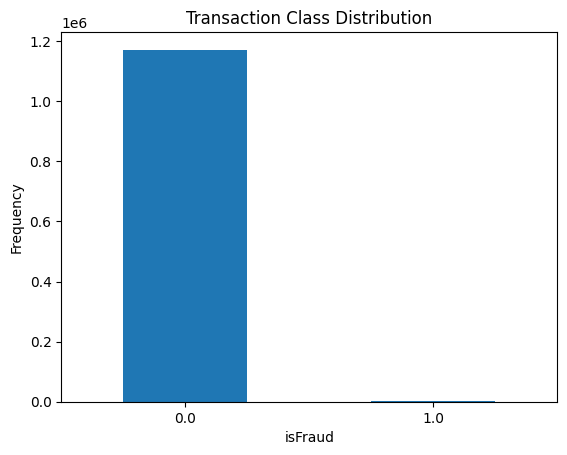

In [29]:
count_features = pd.value_counts(credit_card_data['isFraud'], sort = True)

count_features.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel('isFraud')
plt.ylabel('Frequency')

The value 1 represents the outlier that are there.

In [30]:
fraud = credit_card_data[credit_card_data['isFraud']==1]
Normal = credit_card_data[credit_card_data['isFraud']==0]

In [31]:
print(fraud.shape, Normal.shape)

(1510, 11) (1171329, 11)


In [32]:
fraud.amount.describe()

count    1.510000e+03
mean     1.233087e+06
std      2.046895e+06
min      1.190000e+02
25%      9.913927e+04
50%      3.780618e+05
75%      1.371061e+06
max      1.000000e+07
Name: amount, dtype: float64

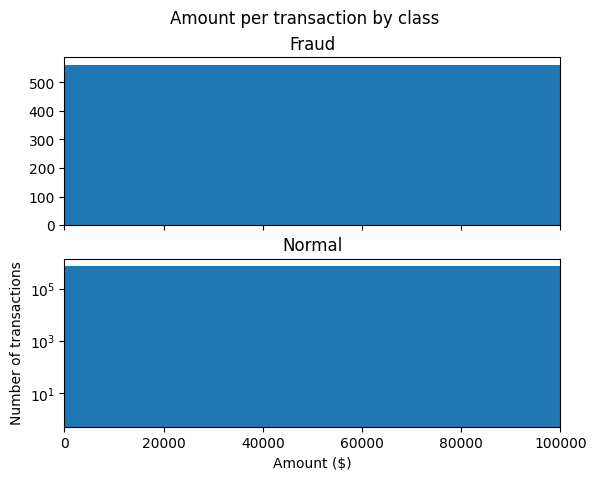

In [33]:
f, (ax1, ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.xlim(0,100000)
plt.yscale('log')
plt.show()

In [34]:
data1 = credit_card_data.sample(frac = 0.1, random_state = 1)
data1.shape

(117284, 11)

In [35]:
Fraud = data1[data1['isFraud']==1]
Normal = data1[data1['isFraud']==0]
outlier_frac = len(Fraud)/float(len(Normal))

In [36]:
print(outlier_frac)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Normal)))

0.001186563660420846
Fraud Cases : 139
Valid Cases : 117145


In [39]:
import pandas as pd

non_numeric_cols = data1.select_dtypes(include=["object"]).columns.tolist()

print(f"Non-numeric columns: {non_numeric_cols}")
data1.drop(non_numeric_cols, axis=1, inplace=True)
corrmat = data1.corr()


Non-numeric columns: ['type', 'nameOrig', 'nameDest']


**What is a correlation matrix??**

A correlation is a tabular representation that displays correlation coefficients, indicating the strength and direction of relationships between variables in a dataset. Within this matrix, each cell signifies the correlation between two specific variables. This tool serves multiple purposes, serving as a summary of data relationships, input for more sophisticated analyses, and a diagnostic aid for advanced analytical procedures.
Strong correlations, indicated by values close to 1 or -1, suggest a robust connection, while weak correlations, near 0, imply a less pronounced association. They are identifying these degrees of correlation aids in understanding the intensity of interactions within the dataset, facilitating targeted analysis and decision-making.

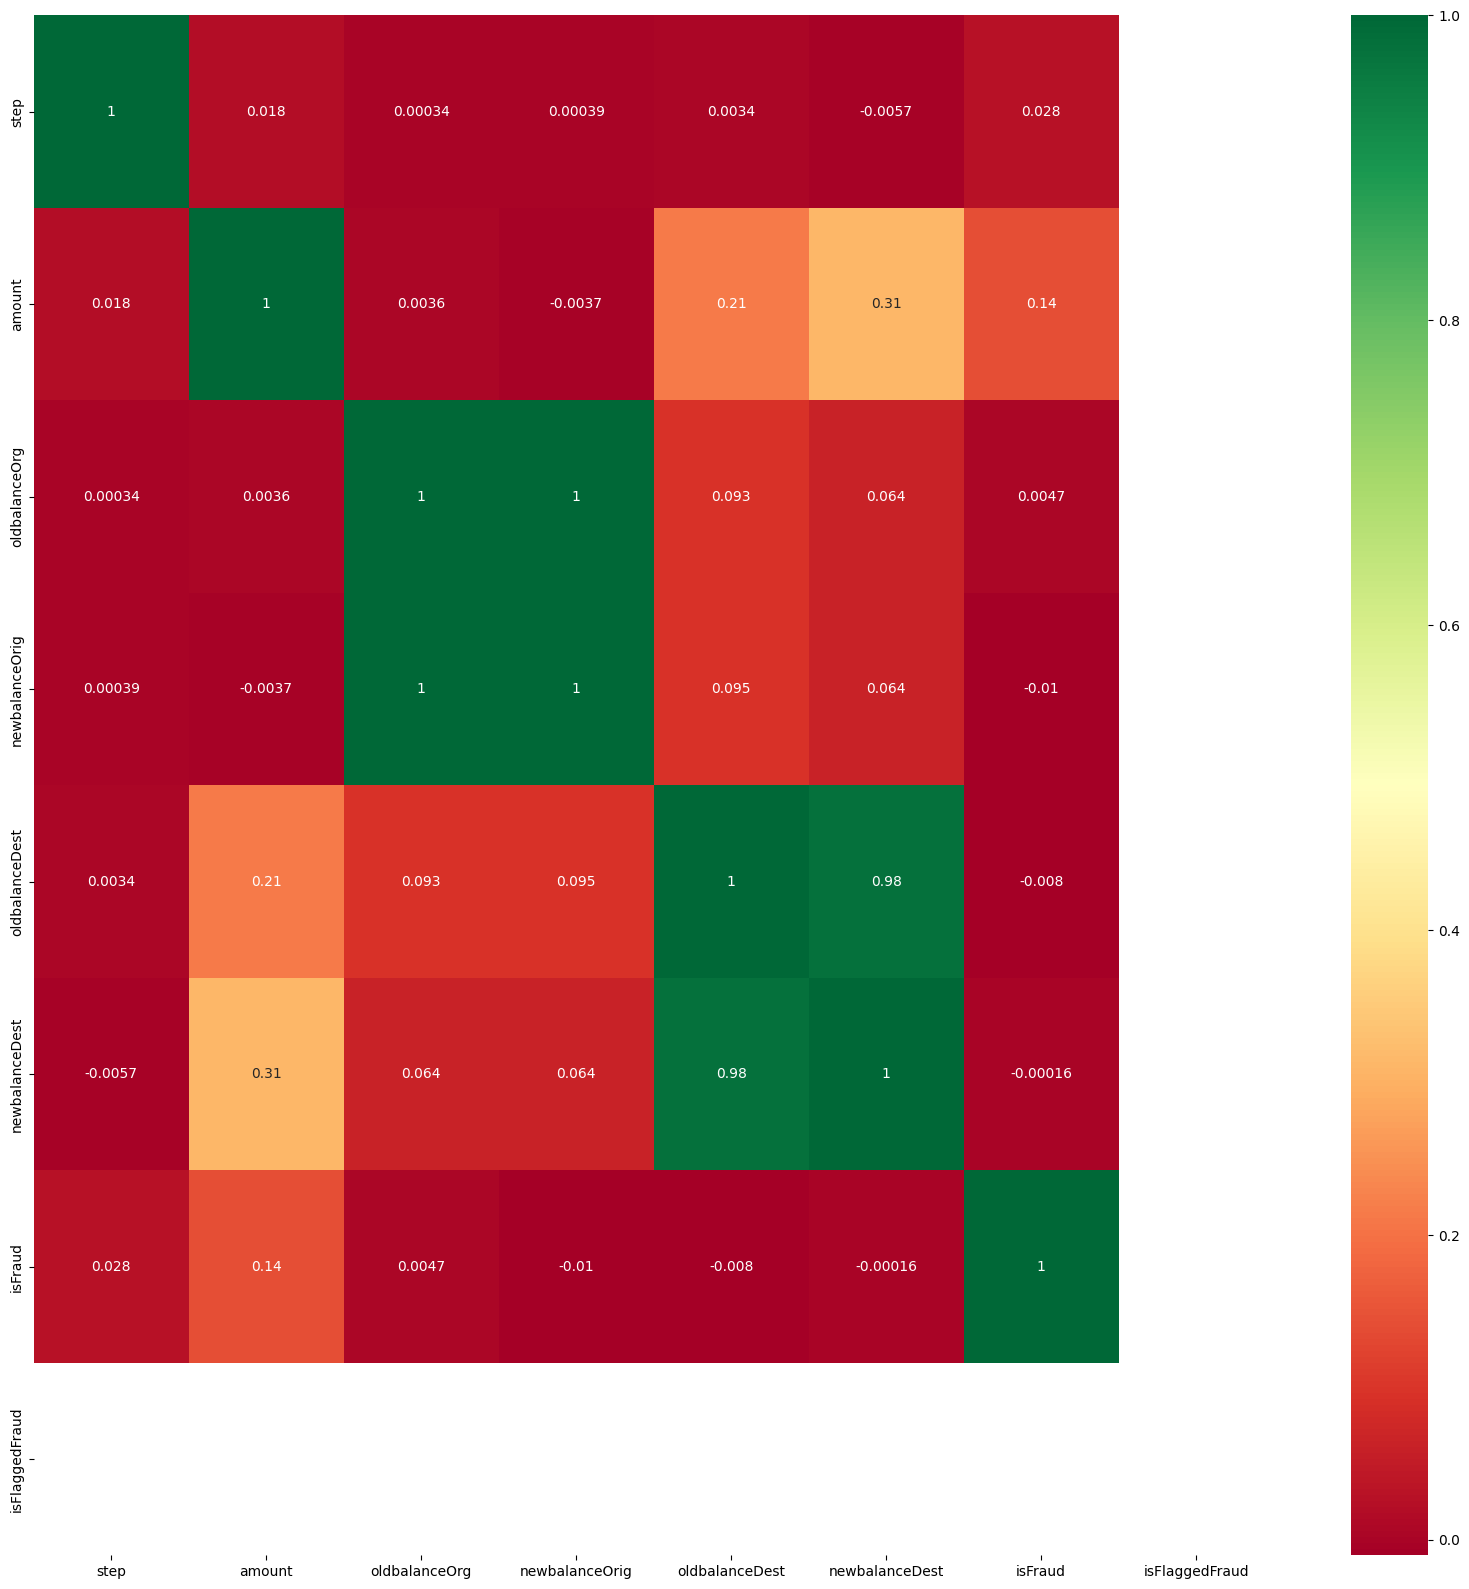

In [40]:
#library having a correlation matrix
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(credit_card_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The above matrix represents that how different - different features are related to each other. How is this

In [46]:
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["isFraud"]]
# Store the variable we are predicting
target = "isFraud"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(117284, 7)
(117284,)


Q. Demonstrate the performance of the model by using best set of tools.

**Isolation Method**

One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.


**Local Outlier Factor**

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

In [51]:
##Define the outlier detection methods
outlier_fraction = 0.01

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),

}

In [52]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 1250
Accuracy Score :
0.9893421097506906
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    117145
         1.0       0.03      0.22      0.05       139

    accuracy                           0.99    117284
   macro avg       0.51      0.61      0.52    117284
weighted avg       1.00      0.99      0.99    117284

Local Outlier Factor: 1302
Accuracy Score :
0.9888987415163194
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    117145
         1.0       0.00      0.04      0.01       139

    accuracy                           0.99    117284
   macro avg       0.50      0.51      0.50    117284
weighted avg       1.00      0.99      0.99    117284



Isolation Forest - 1250 states that there are total of the 1250 of the anomaly are present in the dataSet that has been provided.

Local Outlier Factor - 1302 states that there are total of the 1302 of the anomalies are present in the data sets.



**Q. What are the key factors that predict fraudulent customer?**

The key factor that helped me predicting the fraudulent was the outlier detection. Outlier's are the one which are the values that are set away from the group of the people.

**Q. Do these factors make sense? If yes, How? If not, How not?**

Yes, these factors play a very vital role in identifying fraud because outlier is something that occur when we have some data away from the group of data and in this case these are the values away from the group which indicate that there is some sort of the anomaly present in the dataset.


**Q. What kind of prevention should be adopted while
   company update its infrastructure.**  

i. Enhanced Risk Assessment and planning.

ii.Advanced backup and recovery

    a. Ensure all backup are encrypted to protect the sensitive information.

    b. Regularly test backup and recovery processes to ensure data can be restored quickly and accurately.

iii. Robust testing and validation.

    a. Updates regular data checks so that no dat to be lost.
    b. Ensure all data backups are encrypted to protect sensitive information.

**Q. Assuming these actions have been implemented, how would you determine if they work?**

To determine if the preventive measures implemented during the infrastructure update of a fraud detection company are effective, you need to adopt a structured evaluation and monitoring approach. This involves continuous assessment, testing, and feedback mechanisms to ensure all systems are functioning correctly and securely.
   
